#**2. Sequencing - Turning sentences into data**

In this step, We will create sequence of numbers from the sentences and use tools to process them to make them ready for teaching the neural networks.

We convert each of the sentences into vectors of the sequence of the words the sentences are consisting. 

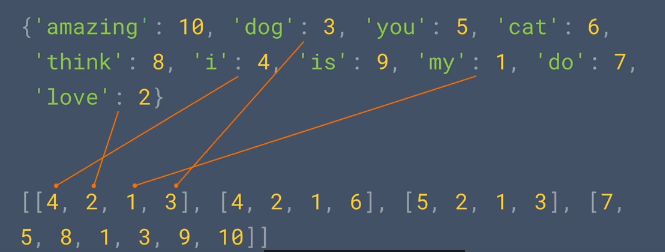

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ['I love my dog','I love my cat', 'You love my dog!', 'Do you think my dog is amazing?'] 

tokenizer = Tokenizer(num_words = 100) #num_words = The number of maximum most frequent words to keep
tokenizer.fit_on_texts(sentences) #Telling the tokenizer to go through all the text and fit itself into them like this
word_index = tokenizer.word_index #The full lit of words

sequence = tokenizer.texts_to_sequences(sentences)

print("word_index:",word_index)
print()
print("sequence:",sequence)

word_index: {'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}

sequence: [[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


This process is for data ready for training a neural networks. But there could be new words in the test data or the real world.

Encountering a new word that the neural network has never seen before could be a problem as this could confuse the tokenizer leading it to omit the word while creating a sequence.

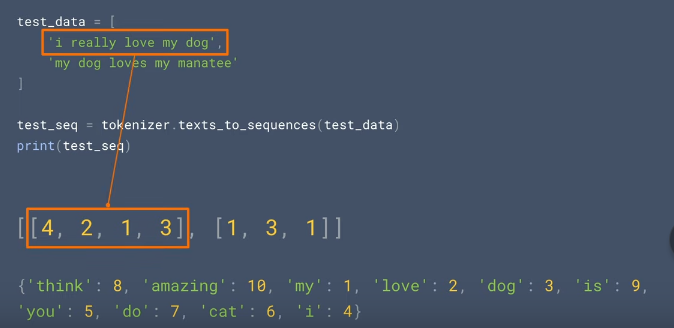

To handle this, We use the "< OOV >" token property

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ['I love my dog','I love my cat', 'You love my dog!', 'Do you think my dog is amazing?'] 

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>") #num_words = The number of maximum most frequent words to keep
tokenizer.fit_on_texts(sentences) #Telling the tokenizer to go through all the text and fit itself into them like this
word_index = tokenizer.word_index #The full lit of words

sequence = tokenizer.texts_to_sequences(sentences)

test_data = ["I really love my dog","My dog loves my manatee"]

print("word_index:",word_index)
print()
print("sequence:",sequence)
print()

test_seq = tokenizer.texts_to_sequences(test_data)
print("Test sequence:",test_seq)
print()
print("Note: The tokenizer creates a token for unknown words as <OOV> and remaing the sentence length intact.")

word_index: {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

sequence: [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Test sequence: [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Note: The tokenizer creates a token for unknown words as <OOV> and remaing the sentence length intact.


A neural networks usually handles sentences of different sizes using "RaggedTensor". But here, We'll be using padding.
The neural network pads all the sentences and makes them of equal length.
Usually, padded lengths are adjusted to meet the maximum lengthed sentence.

Note: < OOV > isn't zero, It's 1. 0 means padding.

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['I love my dog','I love my cat', 'You love my dog!', 'Do you think my dog is amazing?'] 

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>") #num_words = The number of maximum most frequent words to keep
tokenizer.fit_on_texts(sentences) #Telling the tokenizer to go through all the text and fit itself into them like this
word_index = tokenizer.word_index #The full lit of words

sequence = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequence)

print("word_index:",word_index)
print()
print("sequence:",sequence)
print()
print("padded:",padded)

word_index: {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

sequence: [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

padded: [[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


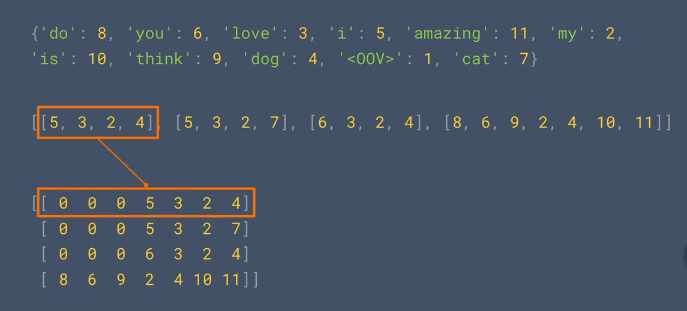

To place zeros at the end of each sentences. 
Also, using the "maxlen" parameter can be used to specify the size of each padded sentence.

If sentences are longer than specified maxlen, then we use the "truncating" parameter.

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['I love my dog','I love my cat', 'You love my dog!', 'Do you think my dog is amazing?'] 

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>") #num_words = The number of maximum most frequent words to keep
tokenizer.fit_on_texts(sentences) #Telling the tokenizer to go through all the text and fit itself into them like this
word_index = tokenizer.word_index #The full lit of words

sequence = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequence, padding = "post", maxlen = 6, truncating="post")

print("word_index:",word_index)
print()
print("sequence:",sequence)
print()
print("padded:",padded)

word_index: {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

sequence: [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

padded: [[ 5  3  2  4  0  0]
 [ 5  3  2  7  0  0]
 [ 6  3  2  4  0  0]
 [ 8  6  9  2  4 10]]
